## Sepsis Prediction with SOFA score - Kidney Example - Circularity in Machine Learning Annotation


In this notebook the circularity test from chapter 2.4.3 of "Validity, Reliability, and Significance: Empirical Methods for NLP and Data Science
" (Riezler&Hagmann, 2021), for the kidney sofa example is executed and visualized step-by-step, just as circularitytest would handle it internally.


**Definition Circularity Test (2.6)**: \
Given a dataset of feature-label relations $D = \{(x^{n}, y^{n})\}^{N}_{n=1}$ where $x^{n} = (x_1, x_2, . . . , x_p)$ is a $p$-dimensional feature vector, let $C \subseteq P(\{1, . . . , p\})$ indicate the set of candidate circular features in dataset $D$, and let $M := \{\mu_c : c \in C\}$ be the set of models obtained by fitting a GAM based on feature set $c$ to the data $D$. A set of circular features $c∗$ is detected by applying the following two-step test:
1. $c∗ = argmax_{c\subseteq C} D^2(\mu_c)$ where $D^2
(\mu_{c∗} )$ is close to 1, and in case
the maximizer is not unique, the maximizer is chosen whose
associated GAM $\mu_{c∗}$ has the smallest degrees of freedom.
2. The feature shapes of any other features added to the GAM
$\mu_{c∗}$ are nullified in the model $\mu\{1,...,p\}$ that is based on the full
feature set.

In [1]:
# Imports
from circularitytest.gam import construct_powerset, construct_gam_term, build_gam, check_nullification, score
from circularitytest.utils import load_r_data, preprocess_replace_data
from circularitytest.plot import plot_gam_terms
from tqdm import tqdm
import pandas as pd
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', 100)


Features, Target for sepsis prediction with kidney sofa score

In [2]:
# Feature definitions
features = sorted(["crea", "urine24", "artph", "bun", "temp", "lactate"])
target = "target"


Construct all possible feature sets $c$ from the features 

In [3]:
# Obtain feature combinations
feature_combinations = construct_powerset(features)
feature_combinations

[['artph'],
 ['bun'],
 ['crea'],
 ['lactate'],
 ['temp'],
 ['urine24'],
 ['artph', 'bun'],
 ['artph', 'crea'],
 ['artph', 'lactate'],
 ['artph', 'temp'],
 ['artph', 'urine24'],
 ['bun', 'crea'],
 ['bun', 'lactate'],
 ['bun', 'temp'],
 ['bun', 'urine24'],
 ['crea', 'lactate'],
 ['crea', 'temp'],
 ['crea', 'urine24'],
 ['lactate', 'temp'],
 ['lactate', 'urine24'],
 ['temp', 'urine24'],
 ['artph', 'bun', 'crea'],
 ['artph', 'bun', 'lactate'],
 ['artph', 'bun', 'temp'],
 ['artph', 'bun', 'urine24'],
 ['artph', 'crea', 'lactate'],
 ['artph', 'crea', 'temp'],
 ['artph', 'crea', 'urine24'],
 ['artph', 'lactate', 'temp'],
 ['artph', 'lactate', 'urine24'],
 ['artph', 'temp', 'urine24'],
 ['bun', 'crea', 'lactate'],
 ['bun', 'crea', 'temp'],
 ['bun', 'crea', 'urine24'],
 ['bun', 'lactate', 'temp'],
 ['bun', 'lactate', 'urine24'],
 ['bun', 'temp', 'urine24'],
 ['crea', 'lactate', 'temp'],
 ['crea', 'lactate', 'urine24'],
 ['crea', 'temp', 'urine24'],
 ['lactate', 'temp', 'urine24'],
 ['artph', 'b

In [4]:
# Data loading: this is usually handled inside circularitytest
data = load_r_data("../data/kidney_sofa_example/kidney_dataset-training_nostd.rds")

Fit GAMs on all feature sets 
and calculate the $D^2$ and effective degrees of freedom for each GAM

In [5]:
#Fit GAMs for powerset and calculate Deviance explained as well as degrees of freedom
gam_results = []


for feature_combination in tqdm(feature_combinations, desc="Fitting GAMs on Powerset"):
    
 
    term_list = construct_gam_term({}, feature_combination)
    gam = build_gam(term_list)

    X, y = data[feature_combination].to_numpy(), data[target].to_numpy()

    gam.fit(X,y)

    result = (feature_combination, gam, round(score(gam, X, y) * 100), gam.statistics_["edof"])

    gam_results.append(result)


Fitting GAMs on Powerset: 100%|██████████| 63/63 [08:27<00:00,  8.05s/it]


Sort GAMs according to $D^2$ and effective degrees of freedom

In [6]:
sorted_result_gams = sorted(gam_results, key=lambda x: (x[2], -x[3]), reverse=True)

df = pd.DataFrame(sorted_result_gams, columns =['Features', 'GAM', 'Deviance Explained', "Effective Degrees of Freedom"]).drop('GAM', 1)
df


,Features,Deviance Explained,Effective Degrees of Freedom
0,"[crea, urine24]",91,15.675604
1,"[artph, crea, urine24]",91,21.430472
2,"[crea, temp, urine24]",91,21.879189
3,"[crea, lactate, urine24]",91,22.303379
4,"[bun, crea, urine24]",91,22.910877
5,"[artph, crea, temp, urine24]",91,27.633939
6,"[artph, crea, lactate, urine24]",91,28.055012
7,"[crea, lactate, temp, urine24]",91,28.505879
8,"[artph, bun, crea, urine24]",91,28.665458
9,"[bun, crea, temp, urine24]",91,29.114067


Check for step 1 of Circularity Test: \
    - Extract features $c*$ where GAM $\mu_{c*}$ has highest $D^2$ and check that $D^2(\mu_{c*})$ is close to 1 \
    - Check that it has the smallest degree of freedom among GAMs with same $D^2$ (not strictly necessary in this instance due to sorting function)

In [7]:
#check that top gam is close to 1
circularity_candidate = sorted_result_gams[0]

assert circularity_candidate[2] > 90, "No GAM has a good fit for the data"
assert all(i > circularity_candidate[3] for i in [elem[3] for elem in sorted_result_gams if elem[0] != circularity_candidate[0]
                                                     and circularity_candidate[2] == elem[2]]),\
                "Best GAM does not have the smallest degrees of freedom"

Check for step 2 of Circularity Test: **Nullification** \
Take GAM fitted on full feature set and check that all features that are not in $c*$ are nullified: feature shapes are constant (zero) function. I used the standard deviation as a measure for nullification. 


-> feature shapes are visualized as further proof under following section Visualizations

In [8]:
# If we have a circularity candidate: check for nullification in GAM with all features
full_gam = [gam[1] for gam in sorted_result_gams if gam[0] == features][0]

nullified_features = check_nullification(full_gam, features, threshold=0.21)
nullified_features


['artph', 'bun', 'lactate', 'temp']

In [9]:
# Check that nullified features are not in circularity candidate feature set c*
if nullified_features == sorted(list(set(features)-set(circularity_candidate[0]))):
    circular_features = circularity_candidate[0]
    print(f"Circular features found: {', '.join(circular_features)}")

else:
    print("No circular features were found.")

Circular features found: crea, urine24


After applying the Circularity Test we can conclude that the feature creatinine(crea) and urine 24 are circular features: \
    - The GAM trained on the crea and urine 24 feature only achieves optimal fit to data with the smallest degrees of freedom. \
    - All other features are nullified in the presence of the crea, urine24 feature.  \
Visualizations are below for further clarification. 

### Visualizations

In [10]:
#Plotting definitions for nice presentation: x and y limits, increased number of splines

config = {"ylim": (-1.3, 4.3),
         "urine24": {
             "xlim": (0,1000),
             "n": 1000,
             "n_splines": 150
         },
         "crea": {
             "xlim": (0.15, 5.2),
             "n_splines": 125
         },
         "artph":{
             "xlim": (7.1, 7.6)
         },
         "bun":{
             "xlim": (0, 200)
         },
          "temp": {
              "xlim": (34, 40)
          },
          "lactate": {
              "xlim": (0, 15)
          }}


Definition of the deterministic rule for target in this IR example

| Condition 1 | Condition 2 | Kidney SOFA Score |
| --- | --- | --- |
| 0 < creatinine $\leq$ 1.2 | 500 < urine | 0 |
| 1.2 < creatinine $\leq$ 1.9 | | 1 |
| 1.9 < creatinine $\leq$ 3.4 | | 2 |
| 3.4 < creatinine $\leq$ 4.9 | 200 < urine $\leq$ 500| 3 |
| creatinine > 4.9 | 0 < urine $\leq$ 200| 4 |

In [11]:
# Encode the rule in dictionary structure for plotting function so that we can
# plot GAM against decision function
decision_function = {0: {"crea": 0,
                        "urine24": 500},
                    1: {"crea": 1.2},
                    2: {"crea": 1.9},
                    3: {"bili": 3.4,
                        "urine24": 200},
                    4: {"crea": 4.9,
                       "urine24": 0}}


Plot GAM $\mu_{c*}$ for identified circular feature set $c*$ reconstructing target labeling function:

It is clear that the GAM can mostly reconstruct the target function given the features that define the function and the fit is (too) perfect. Inaccurcacies in the reconstruction of the decision function are explained in the book by lack of data in certain areas for the circular features.

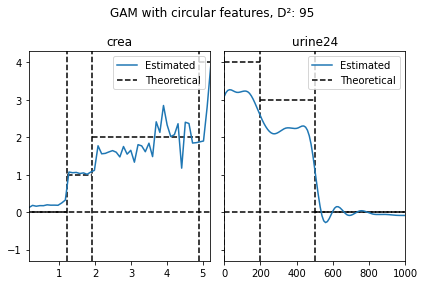

In [12]:
term_list = construct_gam_term({"plot": config}, circular_features, plot=True)
gam = build_gam(term_list)

X, y = data[circular_features].to_numpy(), data[target].to_numpy()
gam.fit(X,y)

title = f"GAM with circular features, D²: {round(score(gam, X,y)*100)}"
plot_gam_terms(config, gam, circular_features, circular_features=circular_features, decision_funct=decision_function, title=title)

Plot GAM on full feature set: Nicely visible is the **Nullification** of the features that do not define the target labeling function.

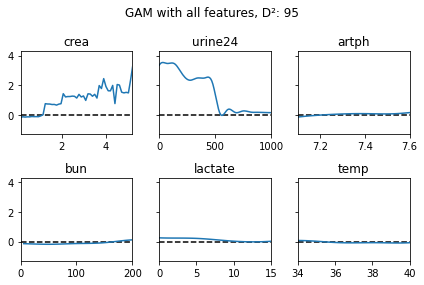

In [13]:
term_list = construct_gam_term({"plot": config}, features, plot=True)
full_gam = build_gam(term_list)

X, y = data[features].to_numpy(), data[target].to_numpy()
full_gam.fit(X,y)

title = f"GAM with all features, D²: {round(score(full_gam, X,y)*100)}"
plot_gam_terms(config, full_gam, features, circular_features=circular_features, title=title)

Plot GAM on non-circular features for comparison: If circular features are not given, the other features have a reasonable impact on the prediction.
But the fit of the model is not optimal. 

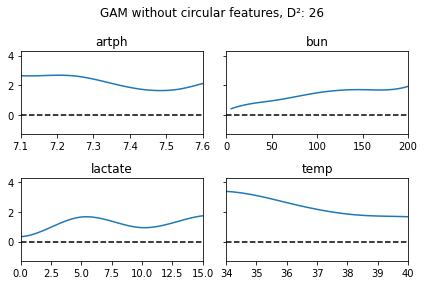

In [14]:
non_circular_gam = [gam[1] for gam in sorted_result_gams if gam[0] == nullified_features][0]
title = f"GAM without circular features, D²: {round(score(non_circular_gam, data[nullified_features].to_numpy(), data[target].to_numpy())*100)}"

plot_gam_terms(config, non_circular_gam, nullified_features, title=title)
